# Keras tutorial
This tutorial is a modification from https://elitedatascience.com/keras-tutorial-deep-learning-in-python

In [1]:
import numpy as np
from keras.models import Sequential # linear stack of neural network layers
from keras.layers import Dense, Dropout, Activation, Flatten # layers to use
from keras.layers import Convolution2D, MaxPooling2D # CNN layers
from keras.utils import np_utils

C:\Users\oscar\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Loading Data

Loading MNIST images. I'm using tensorflow version of the MNIST dataset because they are already flattened into 1d arrays

In [5]:
import utils # importing from our utils functions

In [6]:
x_train, y_train, x_test, y_test = utils.read_mnist()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data\MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data\MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data\MNIST_data\t10k-images-idx3-ubyte.gz
Extracting data\MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


We can look at the shape of the dataset:

In [7]:
x_train.shape

(55000, 784)

Visually inspect a digit:

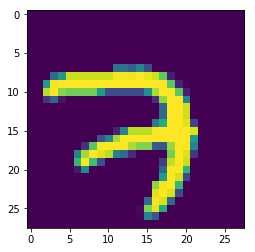

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(np.reshape(x_train[0], (28, 28)))

## Data preparation

reshape the data to $28\times28\times1$ arrays for CNN layers, where 1 means one channel (black & white in our case)

In [9]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [10]:
x_train.shape

(55000, 28, 28, 1)

Convert our data type to float32 and normalize our data values to the range [0, 1].

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Note that in the tensorflow version of mnist our labels have already been [one-hot](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/) coded.

In [12]:
y_train.shape

(55000, 10)

## Define model architecture

In [13]:
# declare sequential model
model = Sequential() 

In [14]:
# CNN input layer 
# the defaults for strides is (1,1) but it's always good to be explicit
model.add(Convolution2D(filters=32, kernel_size=(3, 3), strides=(1,1), activation='relu', input_shape=(28, 28, 1)))

We can check the shape of our model output after adding this layer

In [15]:
model.output_shape

(None, 26, 26, 32)

And we can just keep adding layers like we are building legos

In [16]:
model.add(Convolution2D(filters=32, kernel_size=(3, 3), strides=(1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

MaxPooling2D is a way to reduce the number of parameters in our model by sliding a 2x2 pooling filter across the previous layer and taking the max of the 4 values in the 2x2 filter.

Dropout is used to prevent overfitting - read more about it [here](https://www.quora.com/How-does-the-dropout-method-work-in-deep-learning-And-why-is-it-claimed-to-be-an-effective-trick-to-improve-your-network)

In [17]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

## Compile model

We still need to define the loss and optimization method. Keras has a variety of [loss functions](https://keras.io/losses/) and out-of-the-box [optimizers](https://keras.io/optimizers/) to choose from. For this tutorial we'll use cross-entropy as loss function and [Adam](https://arxiv.org/abs/1412.6980) as our optimizer.

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Fitting the model

In [19]:
model.fit(x_train, y_train, 
          batch_size=32, nb_epoch=10, verbose=1)

C:\Users\oscar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
55000/55000 [==============================] - 80s 1ms/step - loss: 0.8093 - acc: 0.7342
Epoch 2/10
55000/55000 [==============================] - 79s 1ms/step - loss: 0.4294 - acc: 0.8666
Epoch 3/10
55000/55000 [==============================] - 79s 1ms/step - loss: 0.3857 - acc: 0.8809
Epoch 4/10
55000/55000 [==============================] - 79s 1ms/step - loss: 0.3646 - acc: 0.8875
Epoch 5/10
55000/55000 [==============================] - 79s 1ms/step - loss: 0.3449 - acc: 0.8920
Epoch 6/10
55000/55000 [==============================] - 79s 1ms/step - loss: 0.3293 - acc: 0.8992
Epoch 7/10
55000/55000 [==============================] - 80s 1ms/step - loss: 0.3163 - acc: 0.9025
Epoch 8/10
55000/55000 [==============================] - 80s 1ms/step - loss: 0.2999 - acc: 0.9067
Epoch 9/10
55000/55000 [==============================] - 81s 1ms/step - loss: 0.2815 - acc: 0.9127
Epoch 10/10
55000/55000 [==============================] - 80s 1ms/step - loss: 0.2689 - acc: 0.9169

We can check how loss and accuracy change over epochs

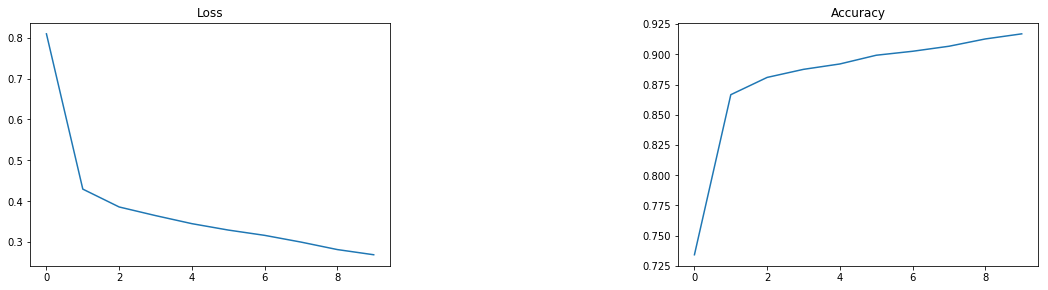

In [20]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(model.history.history['loss'])
plt.title('Loss')
plt.subplot(122)
plt.plot(model.history.history['acc'])
plt.title('Accuracy')
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.show()

## Evaluating our model on the test set

### Loss and Accuracy

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)

In [24]:
score

[0.12938685463927685, 0.9592]

In [25]:
# compute predicted y
y_test_hat = model.predict(x_test)

In [26]:
# get actual digit labels
true_label = np.argmax(y_test, axis=1)
pred_label = np.argmax(y_test_hat, axis=1)

### Cohen's Kappa

In [27]:
p_observed = (true_label == pred_label).sum()/true_label.shape[0]
p_expected = sum([(true_label == i).sum() * (pred_label == i).sum() / (true_label.shape[0] ** 2) for i in range(10)])

In [28]:
kappa = (p_observed - p_expected) / (1 - p_expected)

In [29]:
kappa

0.9546493044048064